<a href="https://colab.research.google.com/github/AdelSobhy/Uneeq_Task1_Customer_Churn_Prediction-/blob/main/Customer_Churn_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Needed Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Reading and Exploring/Viz Data

In [ ]:
X_train=pd.read_csv('customer_churn_dataset-training-master.csv')
X_test=pd.read_csv('customer_churn_dataset-testing-master.csv')

#Taking a look

In [ ]:
X_train.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


#Checking For Data Imbalance

In [ ]:
print(X_train['Gender'].value_counts())
print(X_train['Subscription Type'].value_counts())
print(X_train['Contract Length'].value_counts())

Gender
Male      250252
Female    190580
Name: count, dtype: int64
Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64
Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64


In [ ]:
X_train.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


#Looks like 'Gender','Subscription','Contract Length' Columns needs to be Encoded (Converted to INT)

#Checking Correlations Between Data in the Data-set

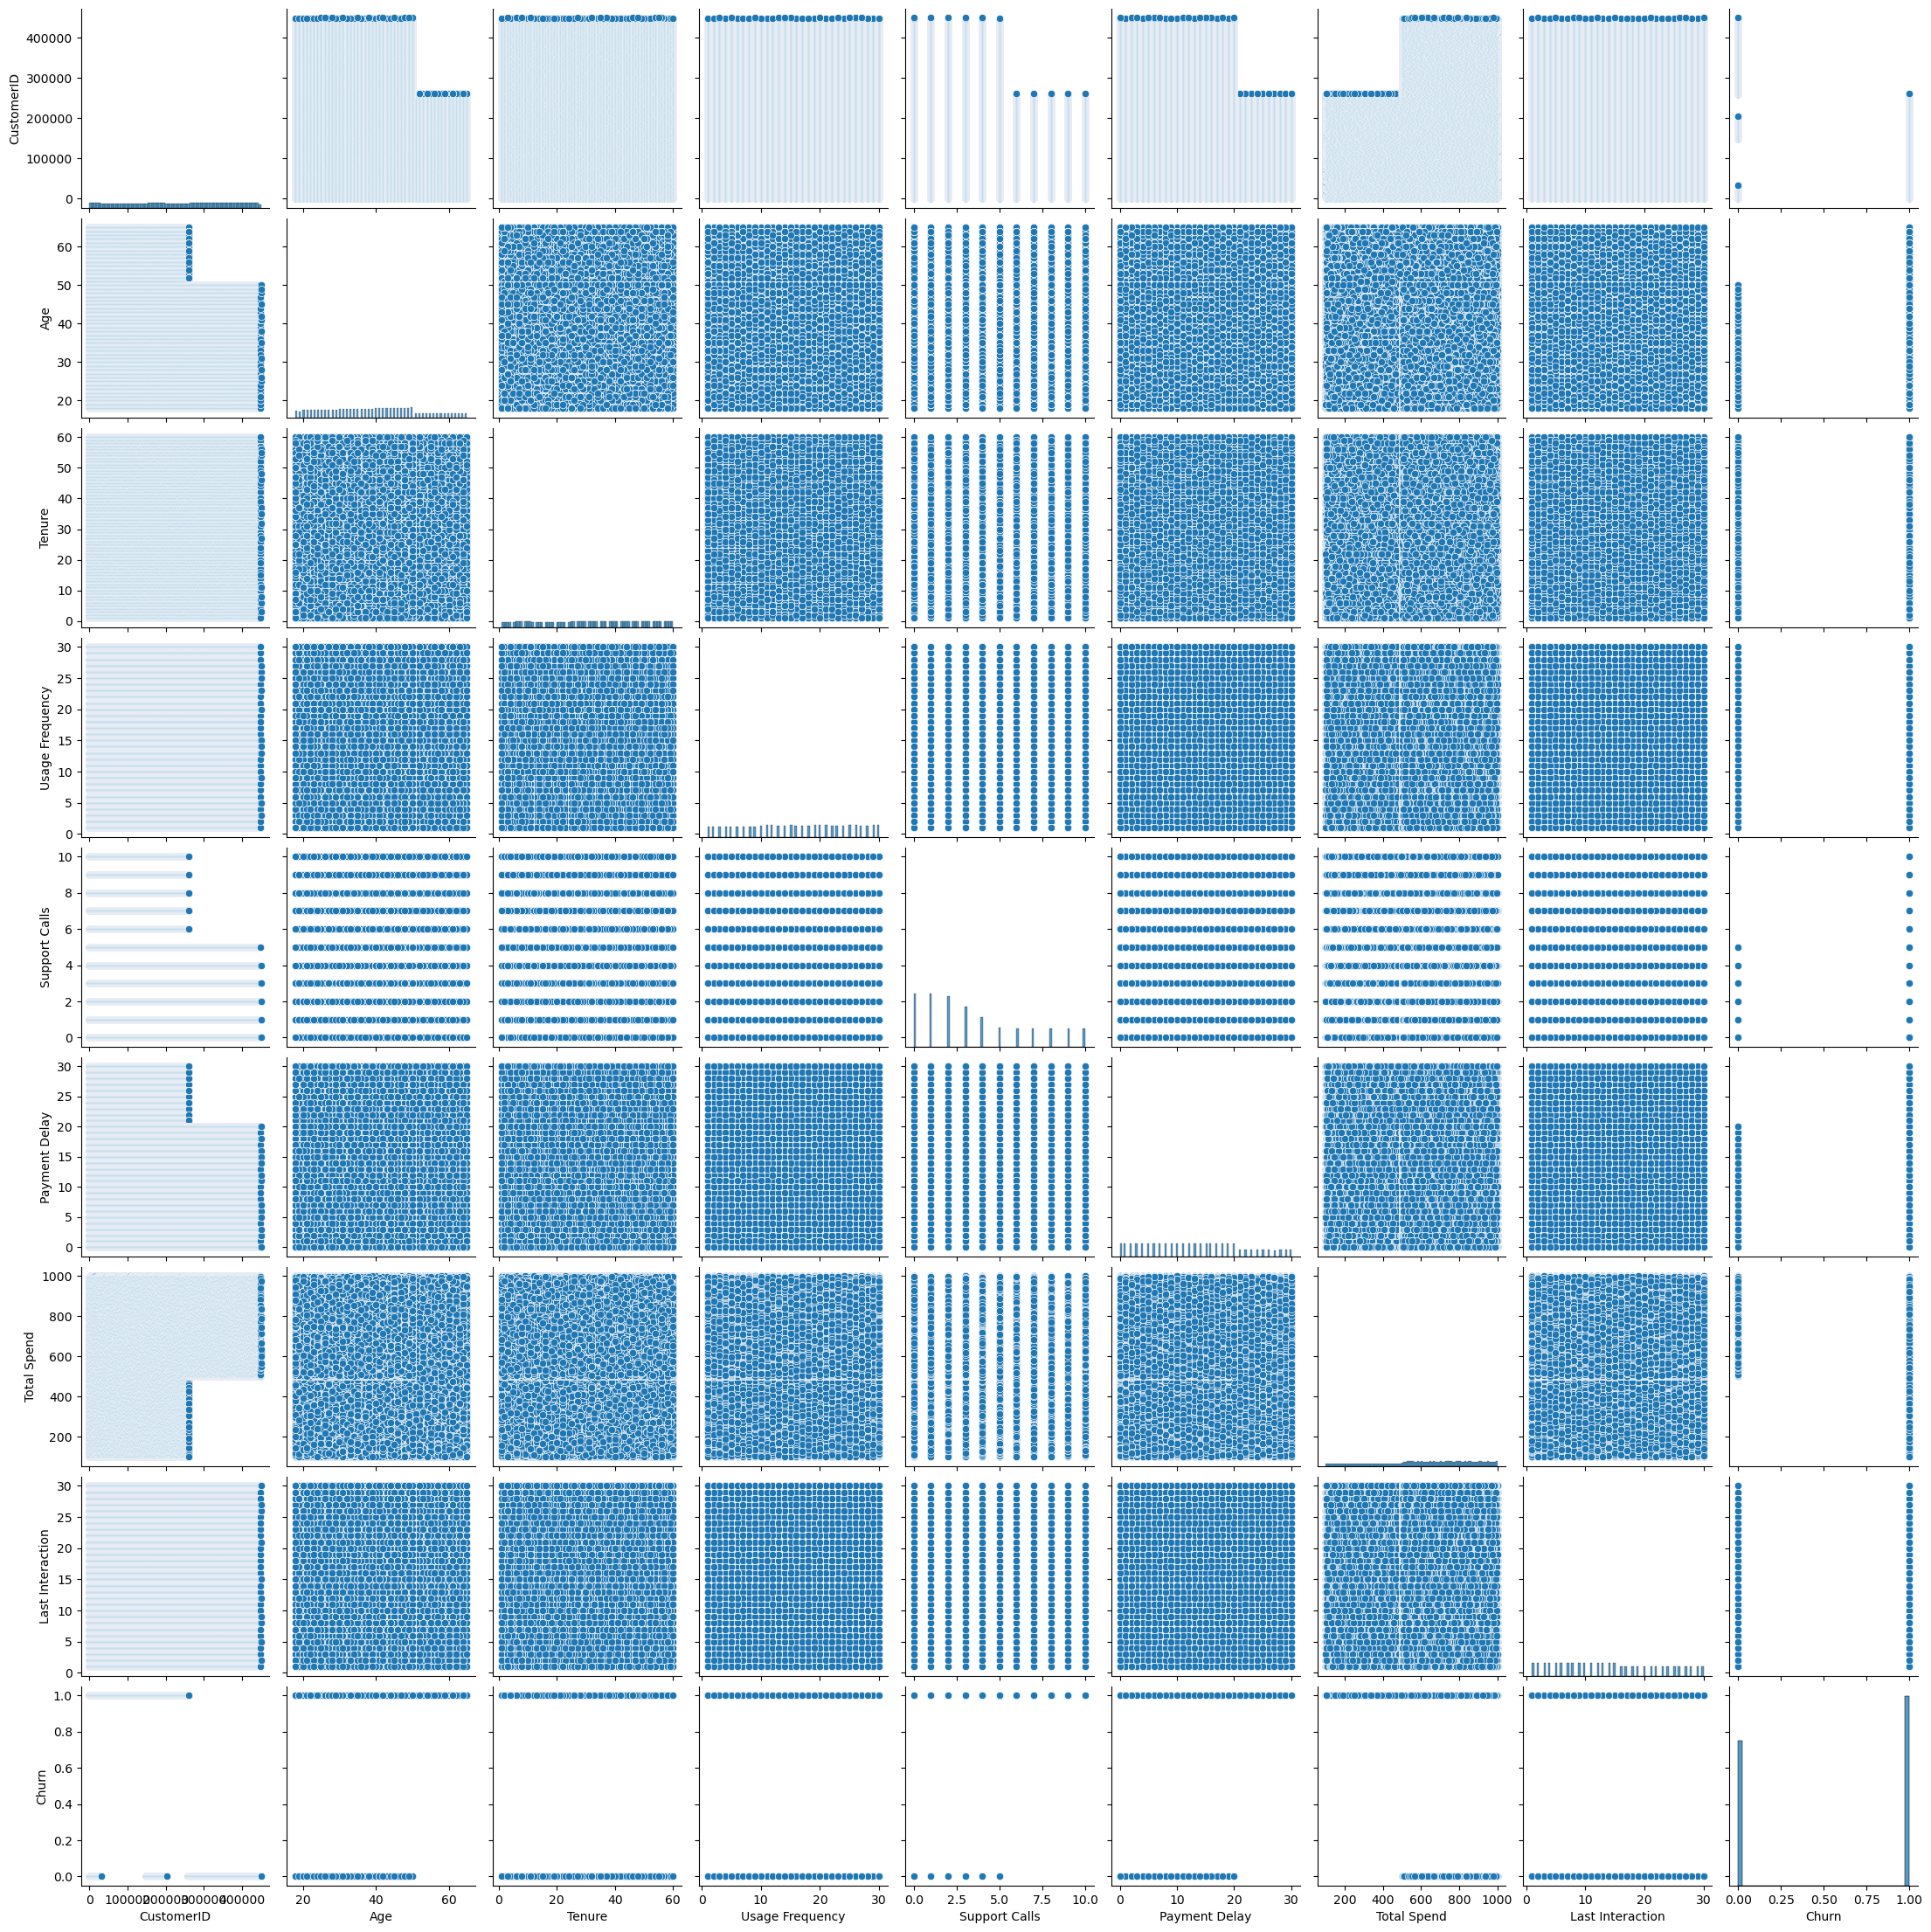

In [ ]:
sns.pairplot(X_train)

#The dataset exhibits characteristics that suggest a classification problem, making it suitable for algorithms like **Logistic Regression**.

#Data PreProcessing and Cleaning To be Able to Vizualize it Freely

In [ ]:
X_train['Gender']=pd.get_dummies(X_train['Gender'], drop_first=True).astype(int)

contract_dummies = pd.get_dummies(X_train['Contract Length'], prefix='Contract', drop_first=True)
X_train = pd.concat([X_train, contract_dummies], axis=1)
X_train.drop('Contract Length', axis=1, inplace=True)

sub_dummies = pd.get_dummies(X_train['Subscription Type'], prefix='Subscription', drop_first=True)
X_train = pd.concat([X_train, sub_dummies.astype(int)], axis=1)
X_train.drop('Subscription Type', axis=1, inplace=True)

X_train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Contract_Monthly,Contract_Quarterly,Subscription_Premium,Subscription_Standard
0,2.0,30.0,0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,False,False,0,1
1,3.0,65.0,0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,True,False,0,0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,False,True,0,0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,396.0,29.0,1.0,True,False,0,1
4,6.0,23.0,1,32.0,20.0,5.0,8.0,617.0,20.0,1.0,True,False,0,0


In [ ]:
#same for x_test
X_test['Gender'] = pd.get_dummies(X_test['Gender'], drop_first=True).astype(int)

contract_dummies_test = pd.get_dummies(X_test['Contract Length'], prefix='Contract', drop_first=True)
X_test = pd.concat([X_test, contract_dummies_test], axis=1)
X_test.drop('Contract Length', axis=1, inplace=True)

sub_dummies_test = pd.get_dummies(X_test['Subscription Type'], prefix='Subscription', drop_first=True)
X_test = pd.concat([X_test, sub_dummies_test.astype(int)], axis=1)
X_test.drop('Subscription Type', axis=1, inplace=True)


In [ ]:
X_test.drop('CustomerID', axis=1, inplace=True)

In [ ]:
#Useless Feature
X_train.drop('CustomerID', axis=1, inplace=True)

In [ ]:
X_train['Contract_Monthly']=X_train['Contract_Monthly'].astype(int)
X_train['Contract_Quarterly']=X_train['Contract_Quarterly'].astype(int)
X_train['Subscription_Premium']=X_train['Subscription_Premium'].astype(int)
X_train['Subscription_Standard']=X_train['Subscription_Standard'].astype(int)
X_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Contract_Monthly,Contract_Quarterly,Subscription_Premium,Subscription_Standard
0,30.0,0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,0,0,0,1
1,65.0,0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1,0,0,0
2,55.0,0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,0,1,0,0
3,58.0,1,38.0,21.0,7.0,7.0,396.0,29.0,1.0,1,0,0,1
4,23.0,1,32.0,20.0,5.0,8.0,617.0,20.0,1.0,1,0,0,0


In [ ]:
X_test['Contract_Monthly'] = X_test['Contract_Monthly'].astype(int)
X_test['Contract_Quarterly'] = X_test['Contract_Quarterly'].astype(int)
X_test['Subscription_Premium'] = X_test['Subscription_Premium'].astype(int)
X_test['Subscription_Standard'] = X_test['Subscription_Standard'].astype(int)

In [ ]:
total_nulls = X_train.isnull().sum().sum()
print(f'Total number of null values: {total_nulls}')
X_train= X_train.dropna()


Total number of null values: 8


#DataViz

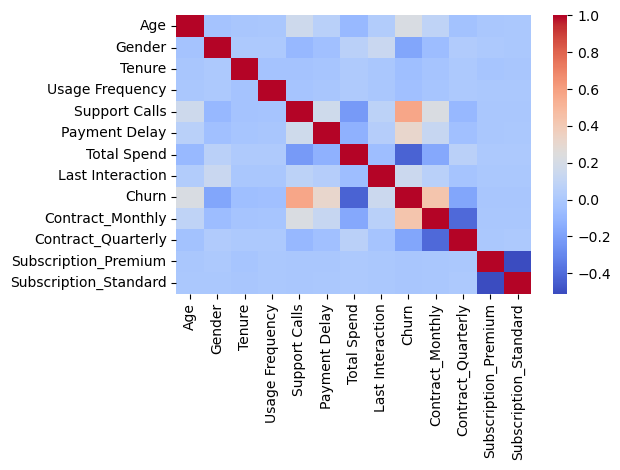

In [ ]:
sns.heatmap( X_train.corr(), cmap='coolwarm')
plt.tight_layout()

<Axes: xlabel='Support Calls', ylabel='Churn'>

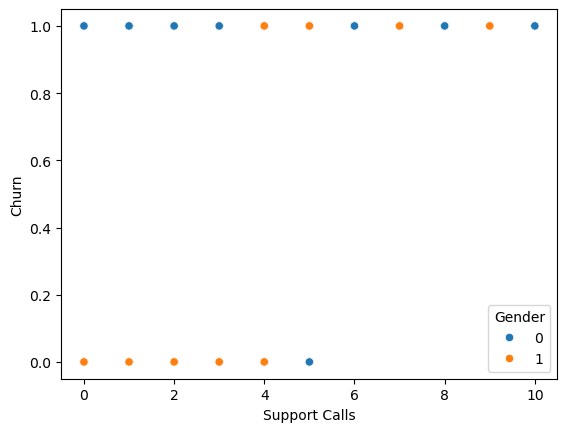

In [ ]:
sns.scatterplot(x=X_train['Support Calls'], y=X_train['Churn'], hue=X_train['Gender'])

<Axes: >

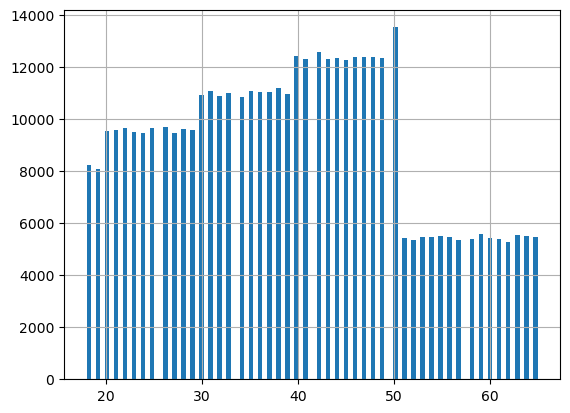

In [ ]:
X_train['Age'].hist(bins=100)

#As we got our data clean and tidy, now we're ready to start our **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

#Splitting Features From Targets

In [ ]:
X = X_train.drop(columns=['Churn'])
y=X_train['Churn']

#Feature Scalling

In [ ]:
scaler = MinMaxScaler()
x_scaled=scaler.fit(X)
x_scaled = scaler.fit_transform(X)


#Training Data Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)


#Applying Logistic Regression

In [ ]:
lm = LogisticRegression(solver='newton-cg', max_iter=2000)
lm.fit(X_train, y_train)
predictions=lm.predict(X_test)


In [ ]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88     57160
         1.0       0.93      0.89      0.91     75090

    accuracy                           0.90    132250
   macro avg       0.89      0.90      0.89    132250
weighted avg       0.90      0.90      0.90    132250



[[51898  5262]
 [ 8523 66567]]


#Applying DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57160
         1.0       1.00      1.00      1.00     75090

    accuracy                           1.00    132250
   macro avg       1.00      1.00      1.00    132250
weighted avg       1.00      1.00      1.00    132250



[[57152     8]
 [   16 75074]]
